The script uses internal data that is provided by Python to plot, thus no need to do anything or worry about any datasets just run all the modules.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
  ds = sklearn.datasets.load_iris()
  df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
  code_species_map = dict(zip(
    range(3), ds['target_names']))
  df['species'] = [code_species_map[c]
    for c in ds['target']]
  return df
df = get_iris_df()

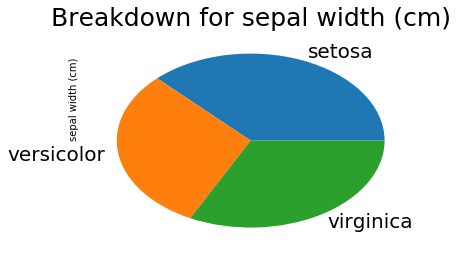

In [2]:
# Pie plot 

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)
plt.savefig('iris_pie_for_one_variable.jpg')
plt.show()

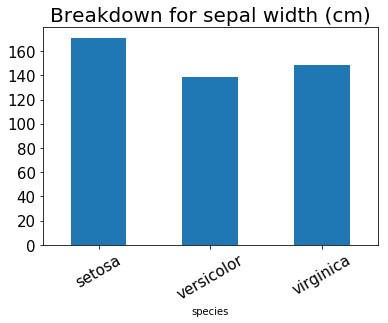

In [3]:
# Bar Graph

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15, 
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
plt.savefig('iris_bar_for_one_variable.jpg')
plt.show()

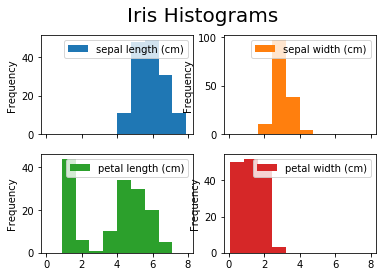

In [4]:
# Histogram

df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

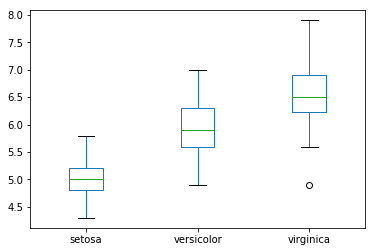

In [5]:
# Boxplot
# Boxplot very easily represents major outliers

col =  'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

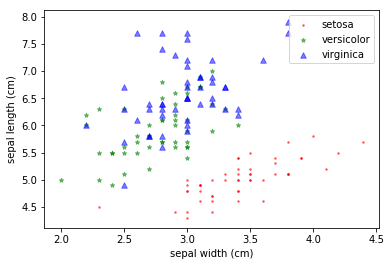

In [6]:
# Scatterplot

colors = ["r", "g", "b"]
markers= [".", "*", "^"]

fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
  ddf = df[df['species']==spec]
  ddf.plot(kind="scatter",
    x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

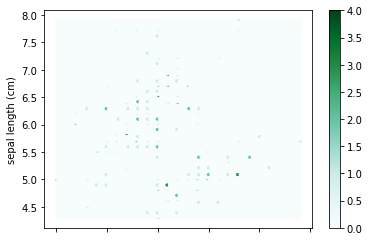

In [7]:
# Heatmap 
# Heatmap is preferred above a scatterplot if there is a lot of datapoints, however when the datapoints are relatively
# little in number a scatterplot is better.

df.plot(kind="hexbin",
    x="sepal width (cm)", y="sepal length (cm)")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


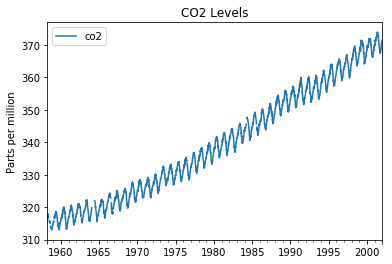

In [8]:
#Timeseries

import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()